In [83]:
import re
import os
import sys
import datetime
import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.tsa.api as smt

from matplotlib.pylab import rcParams
plt.rcParams['savefig.dpi'] = 250
plt.rcParams['figure.figsize'] = (18, 5)
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import autocorrelation_plot

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.formula.api as smf
import statsmodels.api as sm

import scipy.stats as scs
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
from datetime import datetime

from math import sqrt
from sklearn.metrics import mean_squared_error

from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

from sklearn.model_selection import TimeSeriesSplit
from scipy.optimize import minimize 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error

#### Visualizar la demanda como serie de tiempo

In [84]:
#serie de tiempo en grafico
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

#leer la data del excel de los huespedes.csv
demand_data = pd.read_csv('./data/DemandaInfo.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

#guardar en otra variable
demand_ts = demand_data['demand']

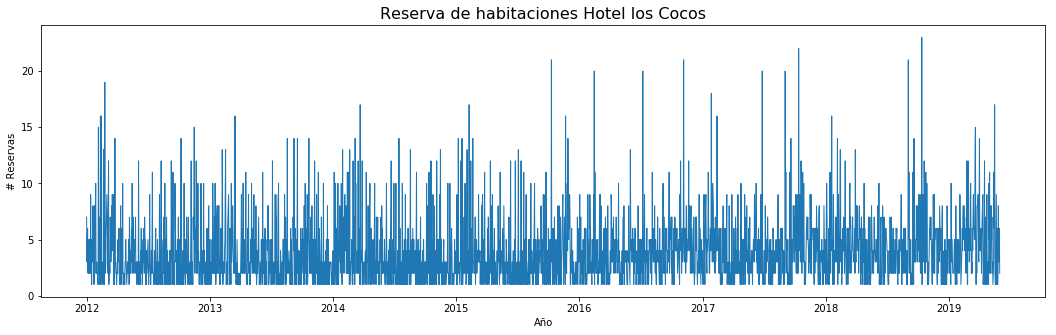

In [85]:
#Plot
plt.plot(demand_ts, linewidth=1)
plt.title(u'Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel(u'# Reservas')
plt.xlabel(u'Año')
plt.show()

In [86]:
#agrupamos los dias por semanas
demand_ts  = demand_data['demand'].resample('W').sum()

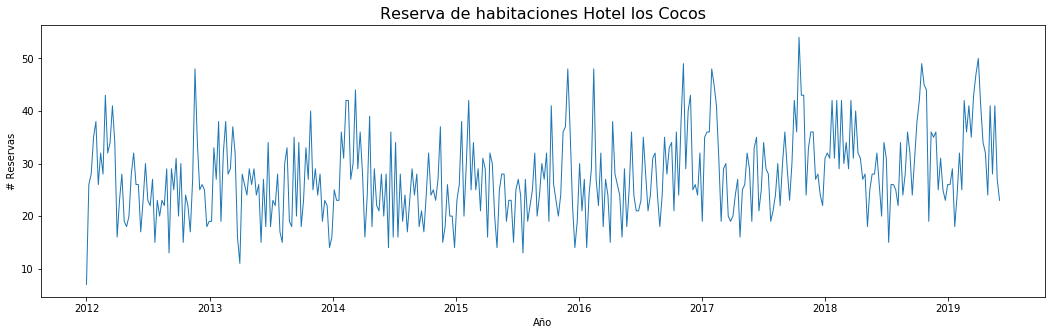

In [87]:
#Plot
plt.plot(demand_ts, linewidth=1)
plt.title(u'Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel(u'# Reservas')
plt.xlabel(u'Año')
plt.show()

In [88]:
demand_ts

time
2012-01-01     7
2012-01-08    26
2012-01-15    28
2012-01-22    35
2012-01-29    38
2012-02-05    26
2012-02-12    32
2012-02-19    28
              ..
2019-04-14    34
2019-04-21    32
2019-04-28    24
2019-05-05    41
2019-05-12    28
2019-05-19    41
2019-05-26    27
2019-06-02    23
Freq: W-SUN, Name: demand, Length: 388, dtype: int64

In [111]:
#Dividir datos de prueba y entrenamiento
train = demand_ts[:'2018']
test = demand_ts['2019':]

print(len(train))
print(len(test))

366
22


In [113]:
#y_test

#### Simple Exponential Smoothing (SES)

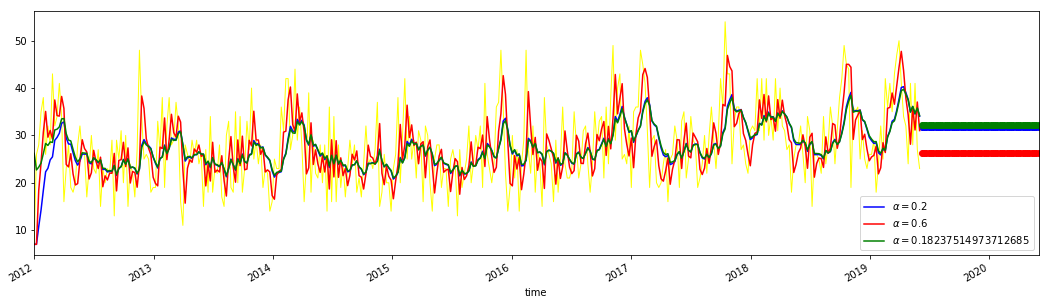

<Figure size 1440x720 with 0 Axes>

In [38]:
#original
plt.plot(demand_ts, linewidth=1, color='yellow', label='Original')

# Simple Exponential Smoothing

fit1 = SimpleExpSmoothing(demand_ts).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(52).rename(r'$\alpha=0.2$')

# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(color='blue')



fit2 = SimpleExpSmoothing(demand_ts).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(52).rename(r'$\alpha=0.6$')

# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot( color='red')


fit3 = SimpleExpSmoothing(demand_ts).fit()
fcast3 = fit3.forecast(52).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(color='green')

pyplot.figure(figsize=(20, 10))
#plt.legend()
plt.tight_layout()
plt.show()

#### Holt-Winters’ Method

In [114]:
fit1 = ExponentialSmoothing(train, seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True)

fit2 = ExponentialSmoothing(train, seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True)

fit3 = ExponentialSmoothing(train, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)

fit4 = ExponentialSmoothing(train, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)

fit5 = ExponentialSmoothing(train, seasonal_periods=52, seasonal='add').fit(use_boxcox=True)

fit6 = ExponentialSmoothing(train, seasonal_periods=52, seasonal='mul').fit(use_boxcox=True)

print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


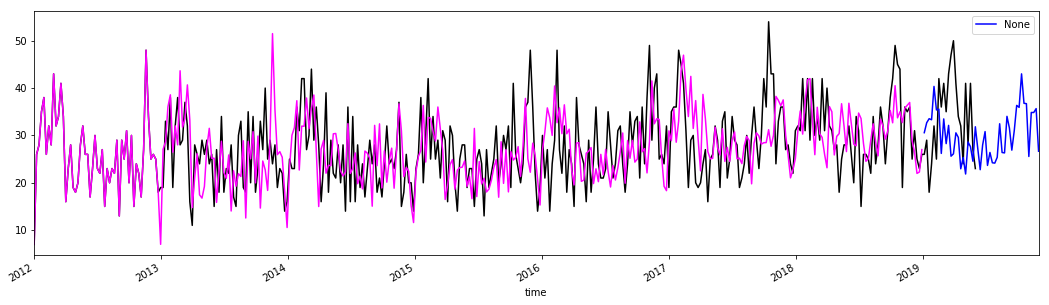

In [115]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#it1 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(color='magenta')
fit1.forecast(48).plot(color='blue', legend=True)
plt.show()

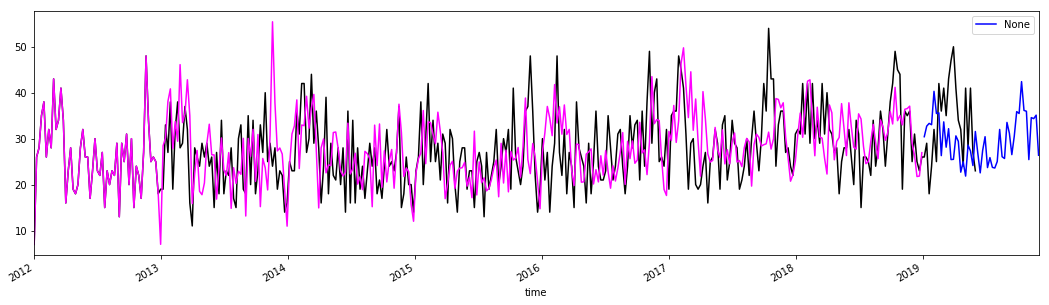

In [116]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit2 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True)
fit2.fittedvalues.plot(color='magenta')
fit2.forecast(48).plot(color='blue', legend=True)
plt.show()

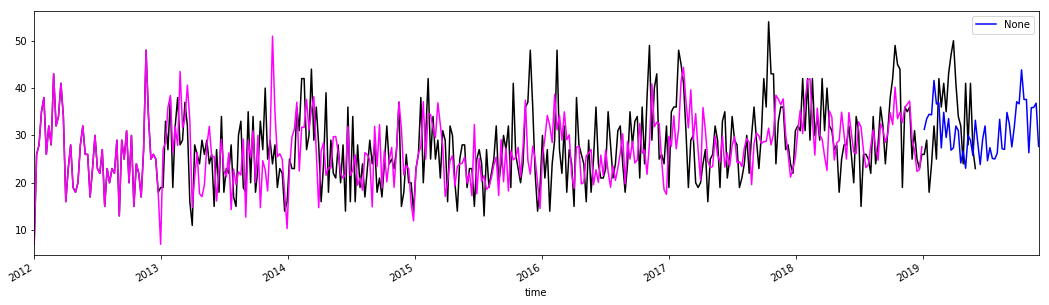

In [117]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit3 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit3.fittedvalues.plot(color='magenta')
fit3.forecast(48).plot(color='blue', legend=True)
plt.show()

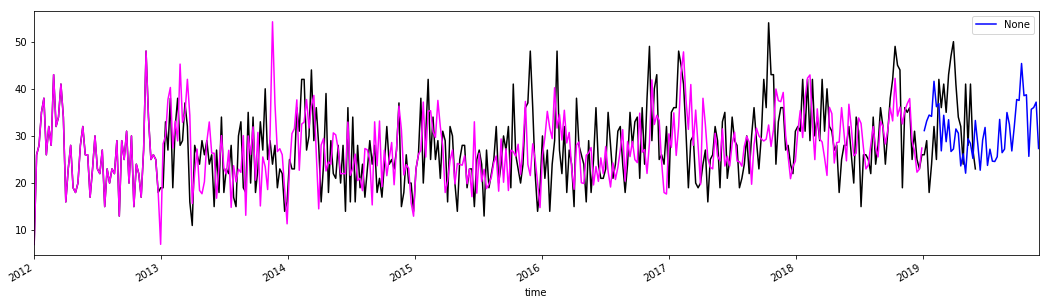

In [118]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit4 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit4.fittedvalues.plot(color='magenta')
fit4.forecast(48).plot(color='blue', legend=True)
plt.show()

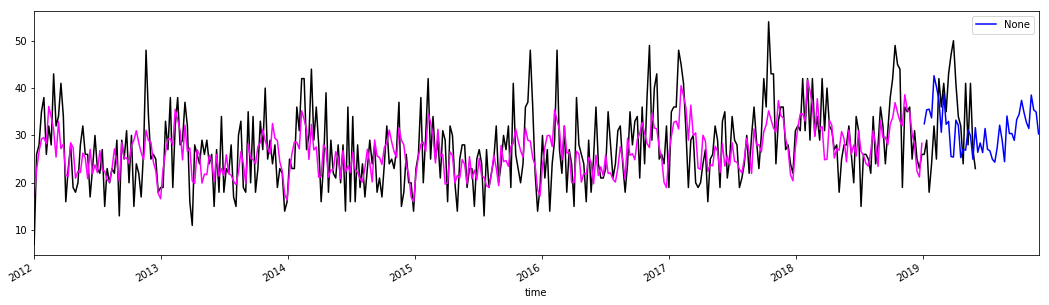

In [119]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit5 = ExponentialSmoothing(demand_ts, seasonal_periods=52, seasonal='add').fit(use_boxcox=True))
fit5.fittedvalues.plot(color='magenta')
fit5.forecast(48).plot(color='blue', legend=True)
plt.show()

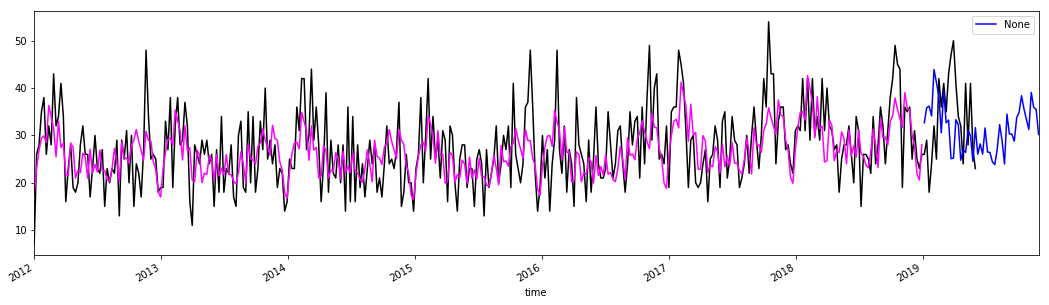

In [120]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit6 = ExponentialSmoothing(demand_ts, seasonal_periods=52, seasonal='mul').fit(use_boxcox=True)
fit6.fittedvalues.plot(color='magenta')
fit6.forecast(48).plot(color='blue', legend=True)
plt.show()

In [121]:
futureDates = pd.date_range(start = '2019-01-06', periods=len(test), freq='W')
futureDates

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28', '2019-05-05', '2019-05-12', '2019-05-19',
               '2019-05-26', '2019-06-02'],
              dtype='datetime64[ns]', freq='W-SUN')

In [122]:
y_hat_avg = test.copy()

fit1 = ExponentialSmoothing(np.asarray(train) ,seasonal_periods=52 , seasonal='mul',).fit(use_boxcox=True)

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))


In [123]:
y_hat_avg['Holt_Winter']

array([32.66127, 35.83103, 36.19664, 34.11707, 43.91333, 41.16616,
       38.28466, 30.53899, 39.49274, 32.65366, 33.24415, 25.08358,
       25.203  , 33.33123, 32.24856, 24.76265, 26.89965, 26.40876,
       31.1237 , 29.92551, 24.51111, 31.6644 ])

In [124]:
Holt_Winter = pd.DataFrame(y_hat_avg['Holt_Winter'], index=futureDates)
#Holt_Winter

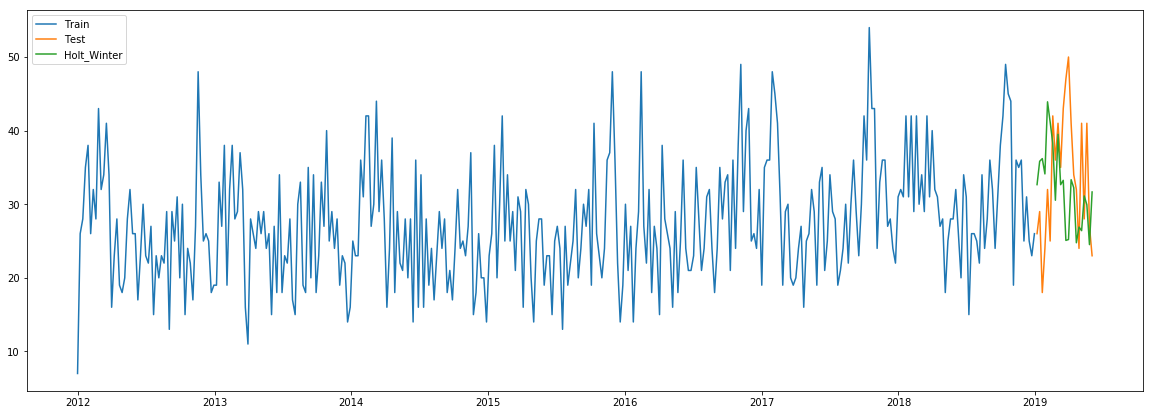

In [125]:
plt.figure(figsize=(20,7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(Holt_Winter, label='Holt_Winter')

plt.legend(loc='best')
plt.show()

In [126]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [127]:
mean_absolute_percentage_error(test,Holt_Winter )

26.206297143365877

In [107]:
pd.set_option('display.max_columns', 3000)
pd.options.display.max_columns = 1600
pd.options.display.max_rows = 1600

Holt_Winter

,0
2019-01-06,32.66127
2019-01-13,35.83103
2019-01-20,36.19664
2019-01-27,34.11707
2019-02-03,43.91333
2019-02-10,41.16616
2019-02-17,38.28466
2019-02-24,30.53899
2019-03-03,39.49274
2019-03-10,32.65366
